# Hypothesis Testing
## You can do it using one of two approaches
### 1- bootstapring and confidence interval to check which hyposis is more likely
### 2- simulate what we believe under null hyposis  and check if our data supports that
Let's highlight the process:

1-Simulate the values of your statistic that are possible from the null.    
2-Calculate the value of the statistic you actually obtained in your data.    
3-Compare your statistic to the values from the null.     
4-Calculate the proportion of null values that are considered extreme based on your alternative.    



pval ≤ α  ⇒ Reject H0

pval > α  ⇒ Fail to Reject H0



### e.x: for all coffee data 

* null hyposis (the population mean height is less than 70) 
* alternative hyposis (the population mean height is more than 70) is actually true.

$$H_0: \mu < 70$$


$$H_1: \mu > 70$$

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
df=pd.read_csv('coffee_dataset.csv')
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


<p style="color:blue;font-size:30px;">Approch One</p>

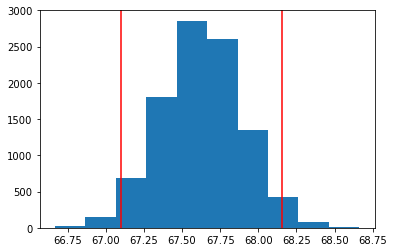

In [21]:
#get sample from the population
sample=df.sample(150)
means=[]
for _ in range(10000):
    #bootstrap sample
    bootsample=sample.sample(150,replace=True)
    means.append(bootsample.height.mean())
#plot sample distribution
plt.hist(means);
# 95%confidence levels
lower,upper=np.percentile(means,2.5),np.percentile(means,97.5)
plt.axvline(x=lower,color='r');
plt.axvline(x=upper,color='r');

# In the above case, our interval was entirely below 70,
# which would suggest the null (the population mean is less than 70) is actually true.

<p style="color:blue;font-size:30px;">Approch Two: Simulating From the Null Hypothesis</p>

Let's highlight the process:

1-Simulate the values of your statistic that are possible from the null.    
2-Calculate the value of the statistic you actually obtained in your data.    
3-Compare your statistic to the values from the null.     
4-Calculate the proportion of null values that are considered extreme based on your alternative.    



pval ≤ α  ⇒ Reject H0

pval > α  ⇒ Fail to Reject H0



66.94989876063028

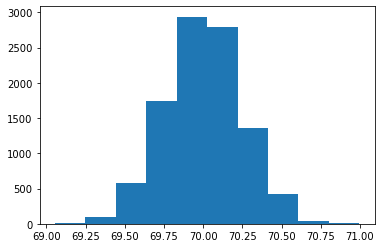

In [29]:
#we assume that the H0 is true and test with the nearest point to h1 which is 70 in our case
#get sample from the population
sample=df.sample(150)

means=[]
for _ in range(10000):
    #bootstrap sample
    bootsample=sample.sample(150,replace=True)
    means.append(bootsample.height.mean())
#get std of means
std=np.std(means)
# now if we assume that the H0 is true then according to the centeral limit thorem the distribution 
# of sample distribution of the mean should be normal around 70

#draw a normal distribution with mean 70 and std of the means
vals=np.random.normal(70,std,10000)#generate values from the disstribution
plt.hist(vals);

#now test if the sample means falls in this distribution
sample.height.mean()
#it is suggested that we do not believe that our null hypothesis value of 70 would be supported, which is true. 
#However, since our null is that the population mean is less than or equal to 70, 
# we do have evidence to support this claim with our sample mean of approximately 67. 
# This would suggest not rejecting our one-sided null alternative.




In [30]:
#calculate p-value
#since h1 is mean > 70 then the p-vale = p(mean > sample mean | h0 is true)
#h0 is true: assuming the normal distribution we simulated is the real distribution for the mean
# p(mean > sample mean | h0 is true): is the area under curve where mean is > sample mean
p_value=(vals > sample.height.mean()).mean() # as this means the number of all value bigger than sample mean by all values count
p_value
# p-value > alpa then Failed to reject h0

1.0

### repeat for
If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? 
**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**
​
$$H_0: \mu_{coff} - \mu_{no} = 0$$
​
​
$$H_1: \mu_{coff} - \mu_{no} \neq 0$$
​
​
**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

0.4238599489521492 
 0.23110456880631763 
 0.4788764946884775


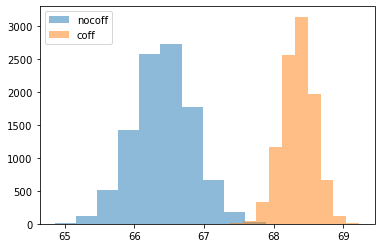

In [23]:
# Approch One
nocoff_means, coff_means, diffs = [], [], []
sample_data = df.sample(200)
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   
print(np.std(nocoff_means),'\n',np.std(coff_means),'\n',np.std(diffs))   
plt.hist(nocoff_means, alpha = 0.5,label="nocoff");
plt.hist(coff_means, alpha = 0.5,label="coff");
plt.legend()


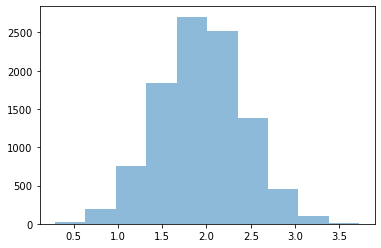

In [24]:
plt.hist(diffs, alpha = 0.5,label="diff");

1.941142785172005

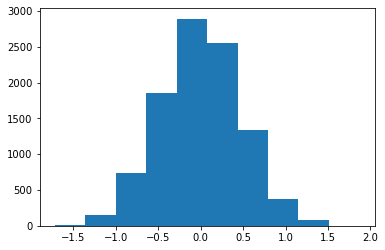

In [25]:
# Approch Two
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null
#difference of means in sample data
sample_data[sample_data['drinks_coffee'] == True]['height'].mean() - sample_data[sample_data['drinks_coffee'] == False]['height'].mean()

#we can reject h0 since the sample statistic doesn't fall in the noraml distribution of what whould the data be if H0 is true

### Calculating Errors

Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets is based on real people.

Use the exercises below to assist in answering the quiz questions at the bottom of this page.

In [76]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')
display(jud_data.head())
par_data.head()
par_data.actual.unique()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


array(['opens', 'fails'], dtype=object)

In [70]:
# you can see the actual and predicted columns for each of the datasets. Using the jud_data, 
#find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.

display( (jud_data.actual != jud_data.predicted).mean() )
false_positive =  ( (jud_data['predicted'] == 'guilty') & (jud_data['actual'] == 'innocent') ).mean()
false_negative =  ( (jud_data.predicted == 'innocent') & (jud_data.actual == 'guilty') ).mean()
false_positive,false_negative


0.042152958945489497

(0.001510366607167376, 0.04064259233832212)

In [78]:
# Using the par_data, find the proportion of errors for the dataset, and furthermore, 
# the percentage of errors of each type.
display( (par_data.actual != par_data.predicted).mean() )
false_positive =  ( (par_data['predicted'] == 'opens') & (par_data['actual'] == 'fails') ).mean()
false_negative =  ( (par_data.predicted == 'fails') & (par_data.actual == 'opens') ).mean()
false_positive,false_negative


0.039972551037913875

(0.00017155601303825698, 0.03980099502487562)

### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

In [123]:
#In this case, imagine we are interested in testing if the mean height of all individuals in full_data is 
# equal to 67.60 inches or different than 67.60.  state the null and alternative hypotheses for these cases in the cell below.
# h0 : muo = 67.60  ,  h1: muo != 67.60


Find:

1-What is the population mean height?    
2-What is the standard deviation of the population heights? Create a sample set of data using the code below.    
3-What is the sample mean height? Simulate the sampling distribution for the mean of five values to see the shape and    plot a histogram.    
4-What is the standard deviation of the sampling distribution of the mean of five draws? 

67.59748697307937

3.119433206550344

67.88234252049084

1.141357351999374

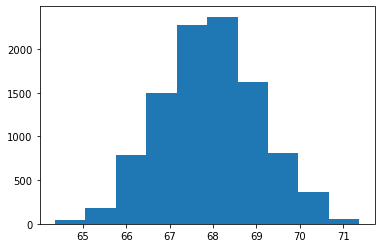

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

# 1  
display(full_data.height.mean())
# 2
display(full_data.height.std())
sample1 = full_data.sample(5)
# 3 
display(sample1.height.mean())
means=[]
for _ in range(10000):
    sample=sample1.sample(5,replace=True)
    means.append(sample.height.mean())
    
plt.hist(means)
# 4
display(np.std(means))

#or 
std_sampling_dist = full_data.height.std()/np.sqrt(5)  

    

67.31765747950915

67.88234252049084

0.804

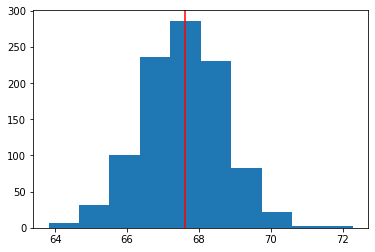

In [143]:
#Using the null and alternative hypotheses 
# h0 : muo = 67.60  ,  h1: muo != 67.60
# and the results of your sampling distribution
# simulate the mean values you would expect from the null hypothesis.
#Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.
observed_mean=sample1.height.mean()
# simulate null distribution
null_vals=np.random.normal(67.6,np.std(means),1000)
plt.hist(null_vals);
plt.axvline(67.6,color='r')
#calculate p-value
upper_bound=observed_mean
lower_bound= 67.6 - ( observed_mean - 67.6)
display(lower_bound,upper_bound)
(sum(null_vals > observed_mean) + sum(null_vals < lower_bound) )/len(null_vals)
# sample1.height.mean()

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [204]:
np.random.seed(42)
null_mean=67.6
sample1 = full_data.sample(1500)
obs_mean=sample1.height.mean()
display(obs_mean)
means=[]
for _ in range(10000):
    sample=sample1.sample(1500,replace=True)
    means.append(sample.height.mean())
    
# plt.hist(means)
# 4
display(np.std(means))

#or 
# std_sampling_dist = full_data.height.std()/np.sqrt(300)  

#Using the null and alternative hypotheses 
# h0 : muo = 67.60  ,  h1: muo != 67.60
# and the results of your sampling distribution
# simulate the mean values you would expect from the null hypothesis.
#Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.
# simulate null distribution
null_vals=np.random.normal(null_mean,np.std(means),10000)#300 sample



#calculate p-value
upper_bound=obs_mean
lower_bound= null_mean - ( obs_mean - null_mean)
pval=(sum(null_vals > upper_bound)  + sum(null_vals < lower_bound) )/len(null_vals)
pval
full_data.shape

67.63939729514867

0.08258456101712124

(2974, 4)

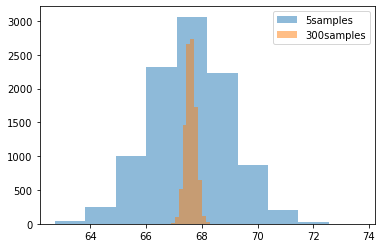

In [156]:
null_vals=np.random.normal(null_mean,np.std(means),10000)#300 sample
null_vals1=np.random.normal(null_mean,std_sampling_dist,10000)#5 sample

plt.hist(null_vals1,alpha=0.5,label='5samples');
plt.hist(null_vals,alpha=0.5,label='300samples');
plt.legend();
#very clear that larger sample leads to lower std(lower valriation) which means more certainty

### Multiple Tests

In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [179]:
import numpy as np
import pandas as pd

df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()
# df.shape[0]

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


In [193]:
.05/df.shape[0]

6.86530275985171e-06

In [192]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

0.001510366607167376

In [194]:
(df.pvalue <= (.05/df.shape[0])).mean()

0.0